## Columns Descreption

- Course Title: This column contains the title of the course offered on Coursera.

- Rating: The rating column likely contains the average rating of the course, as provided by users who have completed the course. Ratings are often given on a scale, such as 1 to 5 stars.

- Level: This column indicates the difficulty or complexity level of the course. It might categorize courses as beginner, intermediate, or advanced, for example.

- Schedule: This column may specify the schedule or timing of the course, such as whether it is flexible schedule or hands-on learning.

- What you will learn: This column likely outlines the learning objectives or topics covered in the course. It provides a summary of the knowledge or skills that participants can expect to gain.

- Skill gain: This column may detail the specific skills that participants will acquire upon completion of the course.

- Modules: The modules column likely lists the different sections or units that make up the course. It could provide an overview of the course's structure and organization.

- Instructor: This column contains information about the instructor(s) or lecturer(s) who teach the course.

- Offered By: This column likely specifies the institution or organization offering the course on the Coursera platform.

- Keyword: This column may contain keywords or tags associated with the course, which can help users search for relevant courses based on specific topics or themes.

- Course Url: This column likely contains the URL or web link to the course page on the Coursera platform.

- Duration to complete (Approx.): This column specifies the approximate time required to complete the course. It is given in terms of hours

- Number of Reviews: This column contains the count of reviews or ratings submitted by users who have completed the course. It provides an indication of the course's popularity and user satisfaction level.


In [ ]:
%pip install wordcloud

## import libraries

In [ ]:
pip install nameparser

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
import nameparser as np
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from ast import literal_eval
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## data reading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CourseraDataset.csv')

## data understanding

In [ ]:
data.head()

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               8156 non-null   float64
 2   Level                8330 non-null   object 
 3   Duration             9333 non-null   object 
 4   Schedule             8912 non-null   object 
 5   Review               8152 non-null   object 
 6   What you will learn  4984 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
dtypes: float64(1), object(12)
memory usage: 974.6+ KB


In [ ]:
data.describe()

,Rating,New_Review,total_Duration
count,8695.000000,8695.000000,8692.000000
mean,4.672386,1975.103623,29.285947
std,0.228959,10079.708556,39.285588
min,1.500000,5.000000,1.000000
25%,4.600000,27.000000,10.000000
50%,4.700000,192.000000,17.000000
75%,4.800000,957.500000,36.000000
max,5.000000,225830.000000,480.000000


## data cleaning

In [ ]:
(data.isnull().sum()/data.shape[0])*100

Course Title            0.000000
Rating                 14.997394
Level                  13.183950
Duration                2.730589
Schedule                7.118291
Review                 15.039083
What you will learn    48.056279
Skill gain              0.000000
Modules                 0.000000
Instructor              0.000000
Offered By              0.000000
Keyword                 0.000000
Course Url              0.000000
dtype: float64

In [ ]:
data['Rating'].unique()

array([4.8, 4.4, 4.5, nan, 4.6, 4.9, 4.7, 3.5, 4.3, 4.1, 4.2, 5. , 3.9,
       3.8, 4. , 3.7, 1.5, 3. , 3.4, 3.1, 3.3, 3.6, 3.2, 2.5])

In [ ]:
data['Rating'].fillna(data['Rating'].mode()[0],inplace=True)

In [ ]:
data['Level'].unique()

array(['Beginner level', 'Intermediate level', nan, 'Advanced level'],
      dtype=object)

In [ ]:
data['Level'].fillna(data['Level'].mode()[0],inplace=True)

In [ ]:
data['Duration'].unique()

array(['20 hours (approximately)', 'Approx. 34 hours to complete',
       '9 hours (approximately)', 'Approx. 8 hours to complete',
       'Approx. 11 hours to complete', 'Approx. 5 hours to complete',
       'Approx. 13 hours to complete', 'Approx. 23 hours to complete',
       'Approx. 44 hours to complete', '10 hours (approximately)',
       'Approx. 26 hours to complete', 'Approx. 12 hours to complete',
       'Approx. 21 hours to complete', '6 hours (approximately)', nan,
       'Approx. 17 hours to complete', 'Approx. 14 hours to complete',
       'Approx. 16 hours to complete', '18 hours (approximately)',
       'Approx. 27 hours to complete', 'Approx. 52 hours to complete',
       '2 months at 10 hours a week', '1 months at 10 hours a week',
       '15 hours (approximately)', 'Approx. 19 hours to complete',
       '5 months at 4 hours a week', 'Approx. 9 hours to complete',
       '16 hours (approximately)', 'Approx. 24 hours to complete',
       'Approx. 93 hours to complete',

In [ ]:
data['Duration'].fillna(data['Duration'].mode()[0],inplace=True)

In [ ]:
data['Schedule'].unique()

array(['Flexible schedule', nan], dtype=object)

In [ ]:
data['Schedule'].fillna('hands on learning',inplace=True)

In [ ]:
data['Review'].unique()

array(['2,813 reviews', '100 reviews', '227 reviews', ..., '689 reviews',
       '1,055 reviews', '669 reviews'], dtype=object)

In [ ]:
data['Review'].fillna(data['Review'].mode()[0],inplace=True)

In [ ]:
data.dtypes

Course Title     object
Rating          float64
Level            object
Duration         object
Schedule         object
Review           object
Skill gain       object
Modules          object
Instructor       object
Offered By       object
Keyword          object
Course Url       object
dtype: object

In [ ]:
data.duplicated().sum()

900

In [ ]:
#drop it
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Review cleaning
def cleaning(review):
    numeric_values = re.findall(r'\d+', review)

# Combine the numeric values into a single string
    combined_numbers = ''.join(numeric_values)
    return combined_numbers
# Apply the cleaning function to the 'Review' column
data['New_Review'] = data['Review'].apply(cleaning)
data['New_Review']=data['New_Review'].astype(int)


In [ ]:
#drop old review
data.drop(['Review'],axis=1,inplace=True)

In [ ]:
data['Duration'].unique()

array(['20 hours (approximately)', 'Approx. 34 hours to complete',
       '9 hours (approximately)', 'Approx. 8 hours to complete',
       'Approx. 11 hours to complete', 'Approx. 5 hours to complete',
       'Approx. 13 hours to complete', 'Approx. 23 hours to complete',
       'Approx. 44 hours to complete', '10 hours (approximately)',
       'Approx. 26 hours to complete', 'Approx. 12 hours to complete',
       'Approx. 21 hours to complete', '6 hours (approximately)',
       '1 months at 10 hours a week', 'Approx. 17 hours to complete',
       'Approx. 14 hours to complete', 'Approx. 16 hours to complete',
       '18 hours (approximately)', 'Approx. 27 hours to complete',
       'Approx. 52 hours to complete', '2 months at 10 hours a week',
       '15 hours (approximately)', 'Approx. 19 hours to complete',
       '5 months at 4 hours a week', 'Approx. 9 hours to complete',
       '16 hours (approximately)', 'Approx. 24 hours to complete',
       'Approx. 93 hours to complete', '5 h

In [ ]:
def total_duration(time):
    pattern = r"(\d+) months at (\d+) hours a week"
# Use re.match to find the pattern in the string
    match = re.match(pattern, time)

    # Check if a match is found
    if match:
        months = float(match.group(1))
        hours_per_week=float(match.group(2))
        return months * 4 * hours_per_week

    # Pattern for "Approx. X hours to complete" or "X hours (approximately)"
    match = re.match(r"Approx\. (\d+) hours? to complete|(\d+) hours? \(approximately",time)
    if match:
        return float(match.group(1) if match.group(1) else match.group(2))

    # Pattern for "X hours"
    match = re.match(r"(\d+(?:\.\d+)?) hours?", time)

    if match:
        hours = float(match.group(1))
        return hours

    # Pattern for "X hour and Y minutes"
    match = re.match(r"(\d+) hour and (\d+) minutes", time)

    if match:
        hours = float(match.group(1))
        minutes = float(match.group(2))

        return hours + minutes / 60

    # Pattern for "X week of study, Y hours"
    match = re.match(r"(\d+) week of study, (\d+(?:\.\d+)?) hours", time)

    if match:
        weeks = float(match.group(1))
        hours_per_week = float(match.group(2))

        return weeks * hours_per_week



In [ ]:
data['total_Duration'] =data['Duration'].apply(total_duration)
data

,Course Title,Rating,Level,Duration,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,New_Review,total_Duration
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design,2813,20.0
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...,100,34.0
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,227,9.0
3,Distribución digital de la música independiente,4.8,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,10,8.0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues,582,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,14 hours (approximately),Flexible schedule,NaN,[],"['Introducción al curso', 'Control de acceso y...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-secur...,30,14.0
8691,Computational Thinking for K-12 Educators: Nes...,4.8,Beginner level,11 hours (approximately),Flexible schedule,NaN,"['Education', 'want', 'Resource', 'Causality']","['Course Orientation', 'Nested If/Else Part 1'...",['Beth Simon'],['University of California San Diego'],Social Sciences,https://www.coursera.org/learn/block-programmi...,10,11.0
8692,Cómo combinar y analizar datos complejos,4.8,Beginner level,Approx. 9 hours to complete,Flexible schedule,NaN,[],"['Estimación básica', 'Modelos', 'Vinculación ...","['Richard Valliant, Ph.D.']","['University of Maryland, College Park']",Social Sciences,https://www.coursera.org/learn/data-collection...,10,9.0
8693,Architecting with Google Kubernetes Engine: Wo...,4.8,Intermediate level,19 hours (approximately),Flexible schedule,NaN,[],"['Introdução ao curso', 'Operações do Kubernet...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-workl...,10,19.0


In [ ]:
data['Modules']

0       ['Introduction', 'Heroes', 'Silhouettes', 'Cou...
1       ['Orientation', 'Module 1', 'Module 2', 'Modul...
2       ['Week 1: Introduction to Pixel Art', 'Week 2:...
3        ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']
4       ['Blues Progressions – Theory and Practice ', ...
                              ...                        
8690    ['Introducción al curso', 'Control de acceso y...
8691    ['Course Orientation', 'Nested If/Else Part 1'...
8692    ['Estimación básica', 'Modelos', 'Vinculación ...
8693    ['Introdução ao curso', 'Operações do Kubernet...
8694                               ['Learn step-by-step']
Name: Modules, Length: 8695, dtype: object

In [ ]:
# transform string represntation of list to acutal list and concate them with ,
data['Modules'] = data['Modules'].apply(lambda x: literal_eval(x) if pd.notna(x) else [])
data['Modules'] = data['Modules'].apply(lambda x: ', '.join(map(str, x)) if x else "Unknown")


In [ ]:
data['Modules']

0       Introduction, Heroes, Silhouettes, Coutures, L...
1       Orientation, Module 1, Module 2, Module 3, Mod...
2       Week 1: Introduction to Pixel Art, Week 2: Pix...
3                  Semana 1, Semana 2, Semana 3, Semana 4
4       Blues Progressions – Theory and Practice , Blu...
                              ...                        
8690    Introducción al curso, Control de acceso y seg...
8691    Course Orientation, Nested If/Else Part 1, Nes...
8692    Estimación básica, Modelos, Vinculación de reg...
8693    Introdução ao curso, Operações do Kubernetes, ...
8694                                   Learn step-by-step
Name: Modules, Length: 8695, dtype: object

In [ ]:
# transform string represntation of list to acutal list and concate them with ,
data['Skill gain'] = data['Skill gain'].apply(lambda x: literal_eval(x) if pd.notna(x) else [])
data['Skill gain'] = data['Skill gain'].apply(lambda x: ', '.join(map(str, x)) if x else "Unknown")


In [ ]:
#replace the empty lists with none
data['Skill gain'][:10]

0     Art History, Art, History, Creativity
1                                   Unknown
2                                   Unknown
3                                   Unknown
4    Music, Chord, Jazz, Jazz Improvisation
5                                   Unknown
6                                   Unknown
7                                   Unknown
8                                   Unknown
9                                   Unknown
Name: Skill gain, dtype: object

In [ ]:
data['Instructor'].value_counts()

['Google Cloud Training']                                        291
['Google Career Certificates']                                   268
[]                                                                88
[' Microsoft']                                                    79
['Taught by Meta Staff']                                          72
                                                                ... 
['Steffen Loft', 'Peter Møller', 'Zorana Jovanovic Andersen']      1
['Olivia S. Anderson']                                             1
['Angus Corbett']                                                  1
['Beth A. Resnick, MPH', 'Joshua Sharfstein, MD']                  1
['You (Lilian) Cheng']                                             1
Name: Instructor, Length: 3587, dtype: int64

In [ ]:
data['Instructor']=data['Instructor'].apply(lambda x:literal_eval(x) if pd.notna(x) else [])
data['Instructor']=data['Instructor'].apply(lambda x:', '.join(map(str,x)) if x else "Uknown"  )


In [ ]:
data['Instructor']

0       Anna Burckhardt, Paola Antonelli, Michelle Mil...
1                                             Cary Nelson
2                        Andrew Dennis, Ricardo Guimaraes
3                               Eduardo de la Vara Brown.
4                                       Dariusz Terefenko
                              ...                        
8690                                Google Cloud Training
8691                                           Beth Simon
8692                              Richard Valliant, Ph.D.
8693                                Google Cloud Training
8694                                   You (Lilian) Cheng
Name: Instructor, Length: 8695, dtype: object

In [ ]:
data['Offered By']=data['Offered By'].apply(lambda x:literal_eval(x) if pd.notna(x) else [])
data['Offered By']=data['Offered By'].apply(lambda x:', '.join(map(str,x)) if x else "Uknown"  )


In [ ]:
data['Offered By'].value_counts()

Coursera Project Network                                           521
University of Colorado Boulder                                     408
Google                                                             307
University of Michigan                                             294
Google Cloud                                                       291
                                                                  ... 
Google - Spectrum Sharing                                            1
École des Ponts ParisTech, BCG                                       1
University of California, Irvine, Tecnológico de Monterrey           1
Talend                                                               1
University of Arizona, University of Florida, Drexel University      1
Name: Offered By, Length: 395, dtype: int64

## Explore the data

In [ ]:
top_ratings=data['Rating'].value_counts()
top_ratings

4.8    3295
4.7    1881
4.6    1132
4.9     719
4.5     673
4.4     332
4.3     196
4.2     134
4.1      78
5.0      68
4.0      41
3.9      39
3.8      27
3.7      15
3.3      14
3.4      11
3.6      10
3.5       9
3.1       7
3.2       6
1.5       3
3.0       3
2.5       2
Name: Rating, dtype: int64

In [ ]:
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
labels=top_ratings.index
#sns.barplot(x=labels[:5], y=top_ratings.values[:5],palette="pastel")
fig = go.Figure(go.Pie(
    labels=labels[:5],  # Assign the labels
    values=top_ratings.values[:5],  # Assign the corresponding values
    marker=dict(
        colors=custom_colors  # Assign custom colors to the segments
    )
))

# Update the layout of the plot
fig.update_layout(
    title="Top 5 ratings",  # Add a title
)
fig.show()


### The most Level relese?

In [ ]:
group=data.groupby('Level').count()
result=group.sort_values(ascending=False,by='Course Title')
result

,Course Title,Rating,Duration,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,New_Review,total_Duration
Level,,,,,,,,,,,,,
Beginner level,6218,6218,6218,6218,3151,6218,6218,6218,6218,6218,6218,6218,6217
Intermediate level,2211,2211,2211,2211,1252,2211,2211,2211,2211,2211,2211,2211,2209
Advanced level,266,266,266,266,182,266,266,266,266,266,266,266,266


Text(0.5, 1.0, 'Level Distribution')

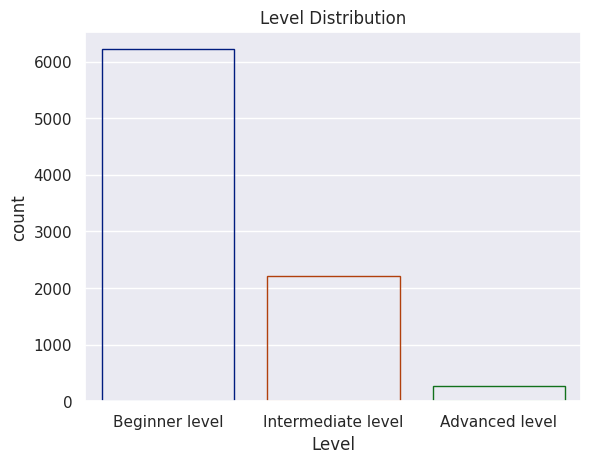

In [ ]:
sns.set(style="dark")
plt.grid()
ax = sns.countplot(x="Level", data=data,facecolor=(0, 0, 0, 0),edgecolor=sns.color_palette("dark",3),color='lightgrey')
plt.title('Level Distribution')

### Does the Rating affect on the Level of Courses?

<ipython-input-117-5caf6a53c32e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'Rating')

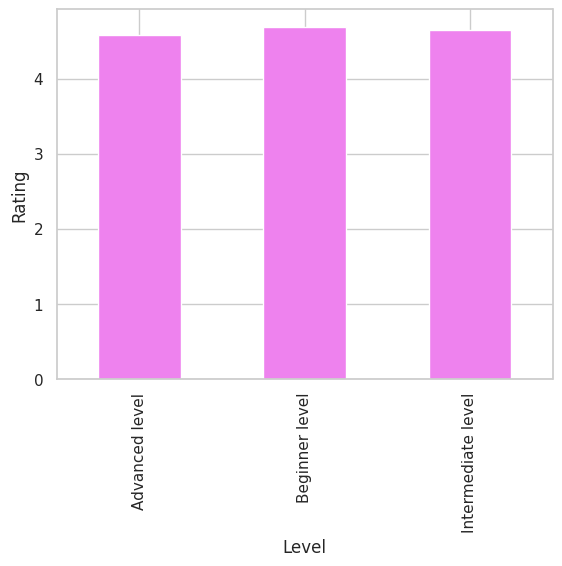

In [ ]:
grouped=data.groupby('Level').mean()['Rating']
grouped.plot(kind='bar',color='violet')
plt.ylabel('Rating')

### What is the avarge duration for each level of courses?

<ipython-input-64-42fa752eeb62>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=data.groupby('Level').mean()['total_Duration']


<BarContainer object of 3 artists>

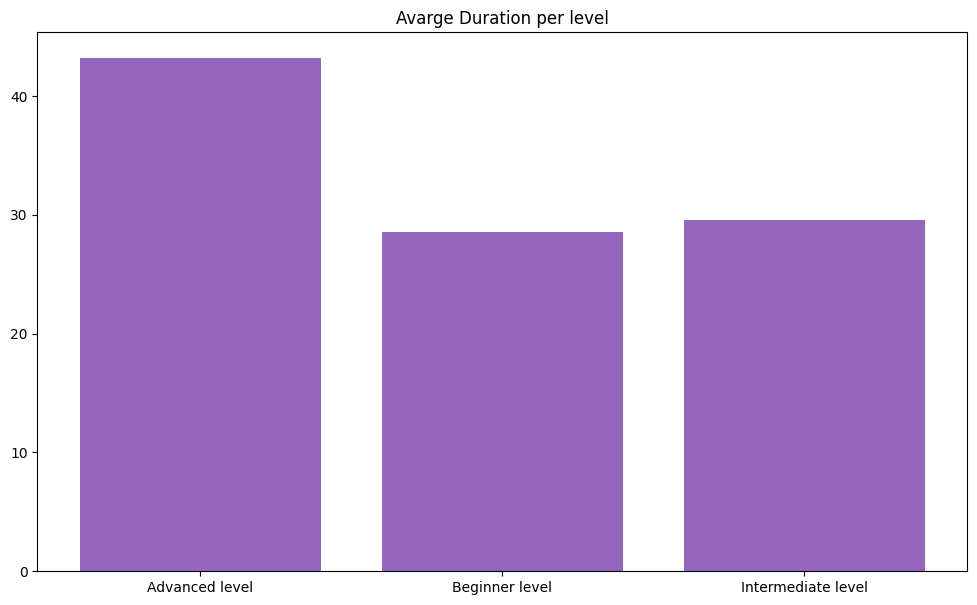

In [ ]:
grouped=data.groupby('Level').mean()['total_Duration']
grouped
plt.figure(figsize=(12,7))
plt.title('Avarge Duration per level')
plt.bar(grouped.index,grouped.values,color='#9467bd')

###What is the most comman skills?

In [ ]:
skills = ''
for skill in data['Skill gain']:
    skills += skill.lower()
    skills += ', '

skills = skills.split(', ')
skills[:10]

['art history',
 'art',
 'history',
 'creativity',
 'unknown',
 'unknown',
 'unknown',
 'music',
 'chord',
 'jazz']

In [ ]:
skill_counter=Counter(skills)

In [ ]:
skill_counter.most_common(15)



[('unknown', 2699),
 ('data analysis', 379),
 ('python programming', 371),
 ('machine learning', 251),
 ('communication', 210),
 ('data visualization', 201),
 ('data science', 192),
 ('cloud computing', 190),
 ('sql', 171),
 ('leadership', 160),
 ('computer programming', 148),
 ('problem solving', 132),
 ('r programming', 127),
 ('marketing', 121),
 ('artificial intelligence (ai)', 121)]

In [ ]:
# split the skills and their counting to visualize it
def visualize_the_commons(counter):
  labels=[]
  values=[]
  for skill, count in counter.most_common(15):
      labels.append(skill)
      values.append(count)
  return labels,values
labels,values=visualize_the_commons(skill_counter)

In [ ]:
# Creating the bar chart
fig = px.bar(x=labels[1:], y=values[1:])
fig.update_traces(marker=dict(color='violet'))
fig.update_layout(title_text="The Most Common Skills")
fig.show()


###the most common Instructor?

In [ ]:
instructors = ''
for instructor in data['Instructor']:
    instructors+=instructor
    instructors+=', '

instructors=instructors.split(',')



['Anna Burckhardt',
 ' Paola Antonelli',
 ' Michelle Millar Fisher',
 ' Stephanie Kramer',
 ' Cary Nelson',
 ' Andrew Dennis',
 ' Ricardo Guimaraes',
 ' Eduardo de la Vara Brown.',
 ' Dariusz Terefenko',
 ' Kristin Wendland']

In [ ]:
#The most common instructor
instructor_counter=Counter(instructors)
labels,values=visualize_the_commons(instructor_counter)

In [ ]:
fig = px.bar(x=labels[1:], y=values[1:])
fig.update_traces(marker=dict(color='purple'))
fig.update_layout(title_text="The Most Common Instructor")
fig.show()


### Offerd by ?

In [ ]:
offerd_by = ''
for offerd in data['Offered By']:
   offerd_by+=offerd
   offerd_by+=', '

offerd_by=offerd_by.split(',')
offerd_by


['The Museum of Modern Art',
 ' University of Illinois at Urbana-Champaign',
 ' Michigan State University',
 ' SAE Institute México',
 ' University of Rochester',
 ' Emory University',
 ' Erasmus University Rotterdam',
 ' Yale University',
 ' Curtis Institute of Music',
 ' Peking University',
 ' Fudan University',
 ' The Museum of Modern Art',
 ' University of Pennsylvania',
 ' University of Colorado Boulder',
 ' Vanderbilt University',
 ' Michigan State University',
 ' Coursera Project Network',
 ' Tel Aviv University',
 ' Indian Institute for Human Settlements',
 " Xi'an Jiaotong University",
 ' Universidades Anáhuac',
 ' Yad Vashem ',
 ' Pontificia Universidad Católica del Perú',
 ' SAE Institute México',
 ' Fudan University',
 ' 上海戏剧学院',
 ' University of Colorado System',
 ' Berklee',
 ' Banco Interamericano de Desarrollo',
 ' University of London',
 ' University of Colorado Boulder',
 ' University of Alberta',
 ' California Institute of the Arts',
 ' California Institute of the Ar

In [ ]:
#The most common instructor
offered_counter=Counter(offerd_by)
labels,values=visualize_the_commons(offered_counter)

In [ ]:
fig = px.bar(x=labels[1:], y=values[1:])
fig.update_traces(marker=dict(color='brown'))
fig.update_layout(title_text="Offered by")
fig.show()


### The common search course title

In [ ]:
def most_freq_words(col):
 long_string = ' '.join(data[col])

 stopwords = set(STOPWORDS)
 stopwords.update(["and", "for", "the", "in", "of"])

 word_cloud =WordCloud(background_color='white', stopwords=stopwords, width=1200, height=700)
 word_cloud.generate(long_string)
 return word_cloud.to_image()

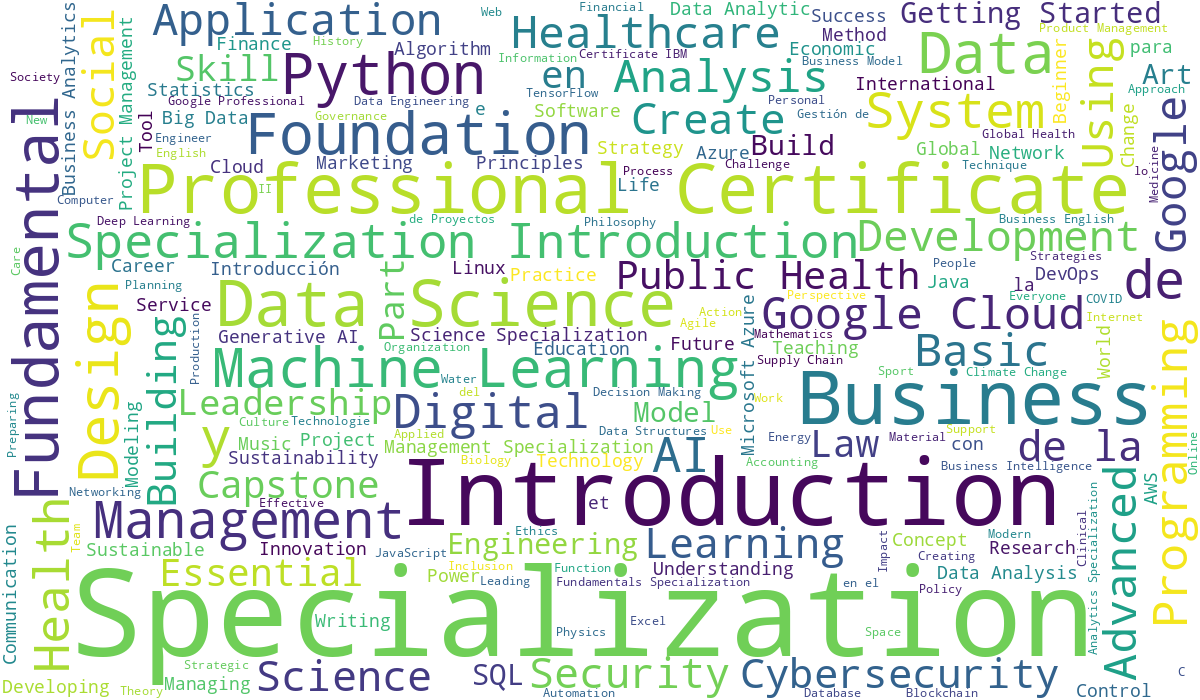

In [ ]:
# Course Title WorldCloud
most_freq_words('Course Title')

### Generate the most frequent keywords per level

Text(0.5, 1.0, 'common keywords in beginner level')

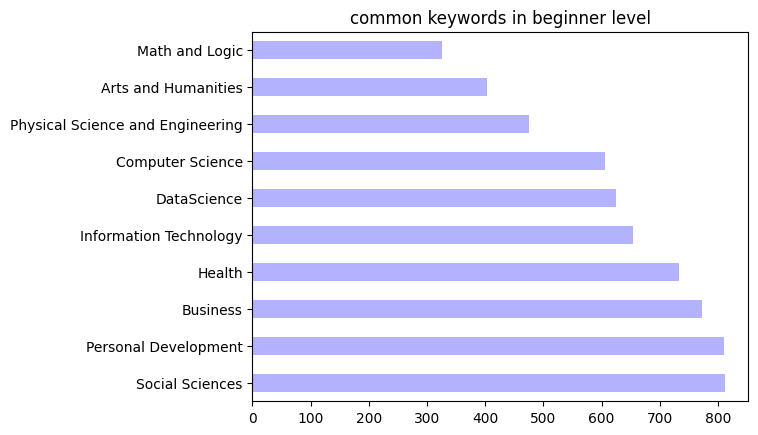

In [ ]:
result = data.query("(`Level`=='Beginner level')")
keywords=result['Keyword'].value_counts()
keywords.plot(kind='barh',color='blue',alpha=0.3)
plt.title('common keywords in beginner level')

Text(0.5, 1.0, 'common keywords in Intermediate level')

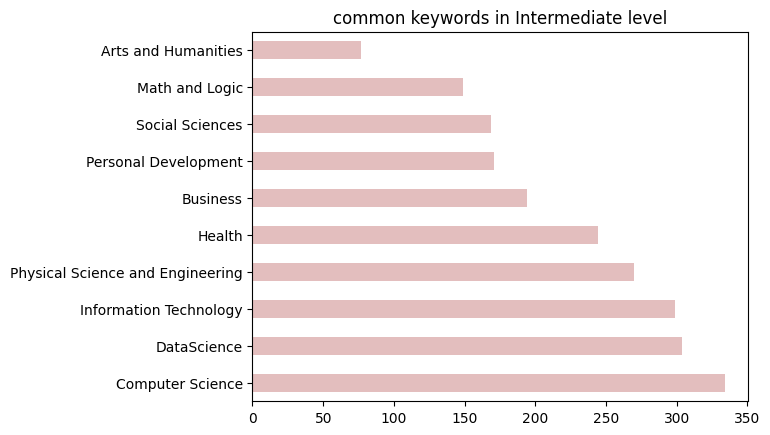

In [ ]:
result = data.query("(`Level`=='Intermediate level')")
result['Keyword'].value_counts()
keywords=result['Keyword'].value_counts()
keywords.plot(kind='barh',color='brown',alpha=0.3)
plt.title('common keywords in Intermediate level')

Text(0.5, 1.0, 'common keywords in Advanced level')

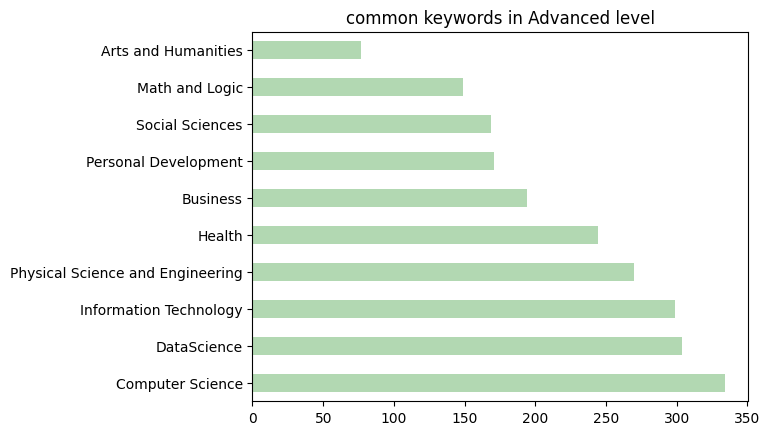

In [ ]:
result = data.query("(`Level`=='Advanced level')")
result['Keyword'].value_counts()
keywords.plot(kind='barh',color='green',alpha=0.3)
plt.title('common keywords in Advanced level')

### Conclusion:
- Most courses achieved a rating of 4.8: This indicates that the courses are generally well-received by learners, as they tend to have high ratings.

- Most courses are suitable for beginners: This suggests that the majority of courses cater to individuals who are new to the subject matter, making them accessible to a wide range of learners.

- Average duration of courses is higher in advanced levels: This implies that advanced-level courses often cover complex topics in greater detail, requiring more time to explain and understand thoroughly.

- Most searched skills are data analysis and Python programming: This indicates a strong demand for skills related to data analysis and programming, reflecting the current trends and industry needs.

- Most instructors are from Google Career Certificate, Ph.D., and Google Cloud Training: This suggests that courses offered by instructors with these credentials may be more popular or trusted by learners.

- Most courses are offered by the University of Colorado Boulder: This highlights the significant presence of the University of Colorado Boulder in the online education space, possibly indicating a strong reputation or diverse course offerings.